# Project 1 Hotels Linear Regression

### Import libraies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

### Set Option to display max columns and Load Cleaned Data

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
HR1 = pd.read_csv('/Users/chercher/Desktop/Entitiy apprenticeship /project 1 hotels/Data/final data/usethis.csv')
HR1

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,res_room_typeR,assn_room_typeR,cust_typeR,res_statusR,hotelR,arrival_date_monthR,mealR,deposit_typeR,market_segmentR,dist_channelR,countryR
0,0,Resort Hotel,0,13,2015,July,29,17,1,2,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,$126.30,0,2,Check-Out,2015-07-20,0,0,2,0,1,6,0,0,0,0,2
1,1,Resort Hotel,1,32,2015,July,29,17,1,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,0,Transient,$154.00,0,0,Canceled,2015-06-24,3,3,2,1,1,6,0,0,0,0,1
2,2,Resort Hotel,0,315,2015,July,29,17,1,2,2,0,0,BB,IRL,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,171,0,Transient,$96.30,0,0,Check-Out,2015-07-20,0,3,2,0,1,6,0,0,1,0,2
3,3,Resort Hotel,0,8,2015,July,29,17,1,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240,0,Transient,$126.30,0,2,Check-Out,2015-07-20,0,3,2,0,1,6,0,0,0,0,0
4,5,Resort Hotel,0,91,2015,July,29,17,1,2,2,1,0,BB,MOZ,Online TA,TA/TO,0,0,0,A,A,4,No Deposit,240,0,Transient,$118.50,0,3,Check-Out,2015-07-20,0,0,2,0,1,6,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102252,112485,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,Transient,$96.14,0,0,Check-Out,2017-09-06,0,0,2,0,0,7,0,0,1,0,2
102253,112486,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,Transient,$225.43,0,2,Check-Out,2017-09-07,4,4,2,0,0,7,0,0,0,0,2
102254,112487,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,$157.71,0,4,Check-Out,2017-09-07,3,3,2,0,0,7,0,0,0,0,2
102255,112488,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,Transient,$104.40,0,0,Check-Out,2017-09-07,0,0,2,0,0,7,0,0,0,0,0


### copied usethis and names it usethis2 after deleting all string data columns

In [4]:
HR2 =  pd.read_csv('/Users/chercher/Desktop/Entitiy apprenticeship /project 1 hotels/Data/final data/usethis2.csv')
HR2

,Unnamed: 0,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,res_room_typeR,assn_room_typeR,cust_typeR,res_statusR,hotelR,arrival_date_monthR,mealR,deposit_typeR,market_segmentR,dist_channelR,countryR
0,0,0,2015,29,17,1,2,2,0,0,0,0,0,0,240,0,0,2,0,0,2,0,1,6,0,0,0,0,2
1,1,1,2015,29,17,1,2,2,0,0,0,0,0,0,240,0,0,0,3,3,2,1,1,6,0,0,0,0,1
2,2,0,2015,29,17,1,2,2,0,0,0,0,0,0,171,0,0,0,0,3,2,0,1,6,0,0,1,0,2
3,3,0,2015,29,17,1,2,2,0,0,0,0,0,0,240,0,0,2,0,3,2,0,1,6,0,0,0,0,0
4,5,0,2015,29,17,1,2,2,1,0,0,0,0,4,240,0,0,3,0,0,2,0,1,6,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102252,112485,0,2017,35,30,2,5,2,0,0,0,0,0,0,394,0,0,0,0,0,2,0,0,7,0,0,1,0,2
102253,112486,0,2017,35,31,2,5,3,0,0,0,0,0,0,9,0,0,2,4,4,2,0,0,7,0,0,0,0,2
102254,112487,0,2017,35,31,2,5,2,0,0,0,0,0,0,9,0,0,4,3,3,2,0,0,7,0,0,0,0,2
102255,112488,0,2017,35,31,2,5,2,0,0,0,0,0,0,89,0,0,0,0,0,2,0,0,7,0,0,0,0,0


## heatmap to check correlations

#### reserved room type and assigned room type highly corrolated at .86, agent and hotelR correlate at .79. Honorable mentions for market segmentR and distribution channelR .57

In [5]:
HR1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,res_room_typeR,assn_room_typeR,cust_typeR,res_statusR,hotelR,arrival_date_monthR,mealR,deposit_typeR,market_segmentR,dist_channelR,countryR
Unnamed: 0,1.0,-0.29,0.00043,0.29,-0.055,0.013,-0.18,-0.23,-0.0047,-0.029,-0.03,-0.027,-0.017,-0.026,0.008,-0.61,-0.022,-0.12,0.1,-0.17,-0.19,0.066,-0.28,-0.8,-0.052,0.03,-0.04,-0.065,-0.023,0.21
is_canceled,-0.29,1.0,0.28,0.0017,0.0043,-0.0069,-0.023,0.0047,0.038,0.0058,-0.031,-0.028,0.12,-0.043,-0.13,-0.077,0.052,-0.19,-0.26,-0.06,-0.16,-0.062,0.98,-0.11,0.0067,-0.019,0.46,0.038,-0.089,-0.16
lead_time,0.00043,0.28,1.0,0.038,0.12,-0.0051,0.047,0.12,0.073,-0.049,-0.022,-0.053,0.1,-0.045,-0.00015,-0.065,0.17,-0.11,-0.12,-0.12,-0.17,0.077,0.26,-0.066,0.13,-0.051,0.39,0.2,-0.11,-0.15
arrival_date_year,0.29,0.0017,0.038,1.0,-0.53,-0.00036,0.023,0.037,0.063,0.067,-0.0084,-0.023,-0.14,0.015,0.037,0.073,-0.063,-0.01,0.12,0.12,0.06,-0.014,0.0019,-0.013,-0.52,0.066,-0.1,-0.15,0.014,0.082
arrival_date_week_number,-0.055,0.0043,0.12,-0.53,1.0,0.058,0.01,0.013,0.0036,-0.00049,0.0079,-0.013,0.043,-0.025,0.0092,-0.031,0.024,-0.0016,0.021,-0.017,-0.0073,-0.023,-0.0018,0.0011,0.99,-0.02,0.015,0.033,-0.0028,-0.0098
arrival_date_day_of_month,0.013,-0.0069,-0.0051,-0.00036,0.058,1.0,-0.015,-0.029,0.0019,0.014,-0.0018,-0.0085,-0.025,0.00098,0.011,0.0048,0.024,0.0058,0.0033,0.022,0.017,0.0091,-0.0033,-0.0037,-0.037,-0.01,-0.0072,0.0036,-0.0076,0.00064
stays_in_weekend_nights,-0.18,-0.023,0.047,0.023,0.01,-0.015,1.0,0.48,0.071,0.04,0.02,-0.056,-0.0029,-0.029,0.047,0.14,-0.065,-0.012,0.056,0.14,0.1,-0.12,-0.017,0.23,0.01,0.013,-0.13,-0.035,0.0023,-0.031
stays_in_week_nights,-0.23,0.0047,0.12,0.037,0.013,-0.029,0.48,1.0,0.072,0.04,0.021,-0.055,-0.014,-0.03,0.072,0.19,-0.0092,-0.016,0.05,0.17,0.12,-0.15,0.0068,0.28,0.017,0.0022,-0.1,-0.029,0.0055,-0.066
adults,-0.0047,0.038,0.073,0.063,0.0036,0.0019,0.071,0.072,1.0,0.014,0.013,-0.074,-0.0033,-0.054,-0.053,-0.035,-0.023,0.036,0.12,0.24,0.19,-0.11,0.028,0.023,0.006,-0.0071,-0.043,-0.11,-0.075,0.048
children,-0.029,0.0058,-0.049,0.067,-0.00049,0.014,0.04,0.04,0.014,1.0,0.018,-0.019,-0.025,-0.0099,0.055,0.041,-0.037,0.064,0.068,0.39,0.36,-0.05,0.0056,0.058,-0.00061,-0.063,-0.1,-0.085,0.027,0.047


### Null Hypothesis is that there is a difference between those who cancelled their hotel bookings and those who did not.

### Making the train and test data sets

In [6]:
y_all = HR2['is_canceled']
x_all = HR2.drop('is_canceled', axis = 1 , inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.1, random_state=101)

### Scaling the data and using logistic regression

In [7]:
scaler_train= StandardScaler()
scaler_train.fit(x_train)
scaler_test= StandardScaler()
scaler_test.fit(x_test)
x_train_scaled = scaler_train.transform(x_train)
x_test_scaled = scaler_test.transform(x_test)

log_model= LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

### Prediction

In [8]:
y_pred= log_model.predict(x_test_scaled)

### Evaluation

In [9]:
accuracy_score(y_test, y_pred)

1.0

In [10]:
confusion_matrix(y_test, y_pred)

array([[6239,    0],
       [   0, 3987]])

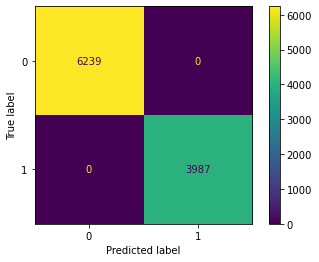

In [11]:
plot_confusion_matrix(log_model, x_test_scaled, y_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6239
           1       1.00      1.00      1.00      3987

    accuracy                           1.00     10226
   macro avg       1.00      1.00      1.00     10226
weighted avg       1.00      1.00      1.00     10226



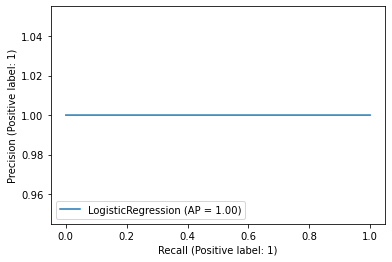

In [13]:
plot_precision_recall_curve(log_model, x_test_scaled, y_test)

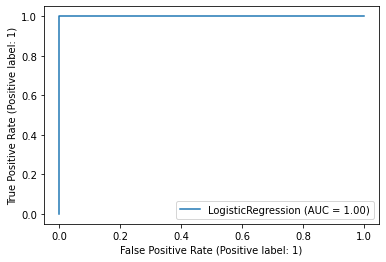

In [14]:
plot_roc_curve(log_model, x_test_scaled, y_test)

### Conclusion: reject the null hypothesis. 1 = perfect correlation these data will never regress to the mean. There is no difference between those that cancelled their hotel booking and those that did not.